# Problem 1: Polynomial model order determination

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random
import torch

# for easier reading np
np.set_printoptions(precision=3,suppress=True)

Text(0, 0.5, 'Target')

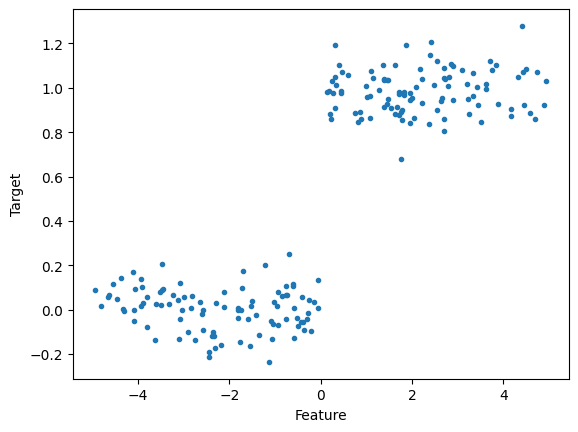

In [3]:
with open('./re_dat.csv', 'r') as f: 
  X = np.genfromtxt(f,delimiter=',',skip_header=1)
  X, y = X[:,:-1], X[:,-1]

plt.plot(X[:, 0], y, '.')
plt.xlabel('Feature')
plt.ylabel('Target')

##### Question 1-a

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

##### Questoin 1-b

In [17]:
kf = KFold(n_splits=5, shuffle=True)
max_order = 15
best_score = -np.inf
best_p = 1

for p in range(1, max_order + 1):
    model = make_pipeline(PolynomialFeatures(p), LinearRegression())
    scores = cross_val_score(model, X_train.reshape(-1, 1), y_train, cv=kf, scoring='r2')
    mean_score = np.mean(scores)
    
    if mean_score > best_score:
        best_score = mean_score
        best_p = p

print(f"Best polynomial order: P* = {best_p}, Validation R^2 = {best_score:.4f}")


Best polynomial order: P* = 15, Validation R^2 = 0.8990


##### Questoin 1-c

In [18]:
best_model = make_pipeline(PolynomialFeatures(best_p), LinearRegression())
best_model.fit(X_train.reshape(-1, 1), y_train)
r2_score_test = best_model.score(X_test.reshape(-1, 1), y_test)
print(f"Test R^2 score: {r2_score_test:.4f}")

Test R^2 score: 0.9530


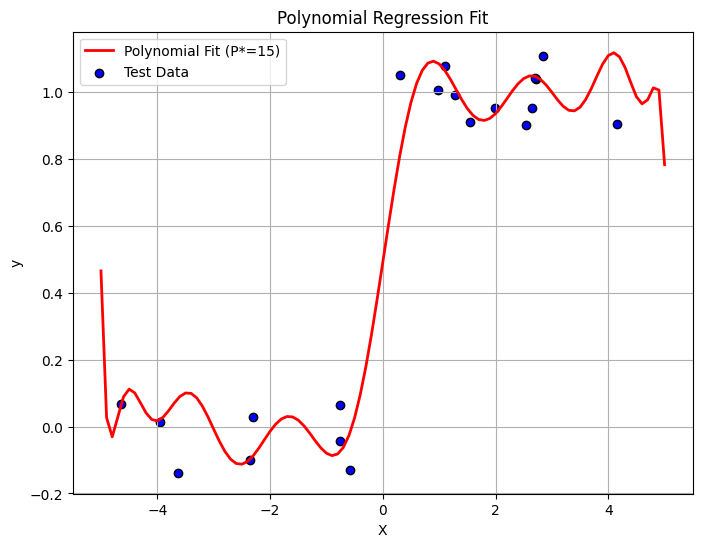

In [19]:
# Generate a smooth curve for the polynomial function
X_range = np.arange(-5, 5.1, 0.1).reshape(-1, 1)  # Grid from -5 to 5 with step 0.1
y_pred = best_model.predict(X_range)  # Predict values

# Plot the trained model
plt.figure(figsize=(8, 6))
plt.plot(X_range, y_pred, label=f"Polynomial Fit (P*={best_p})", color='red', linewidth=2)
plt.scatter(X_test, y_test, label="Test Data", color='blue', edgecolor='black')  # Overlay test data
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.grid(True)
plt.show()


##### Question 2-a